In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [3]:
data = pd.read_csv('Movie_Review.csv')

In [4]:
data.dropna(inplace=True)

In [5]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [6]:
data['text'] = data['text'].apply(clean_review)

In [7]:
#wordcloud 

from wordcloud import WordCloud

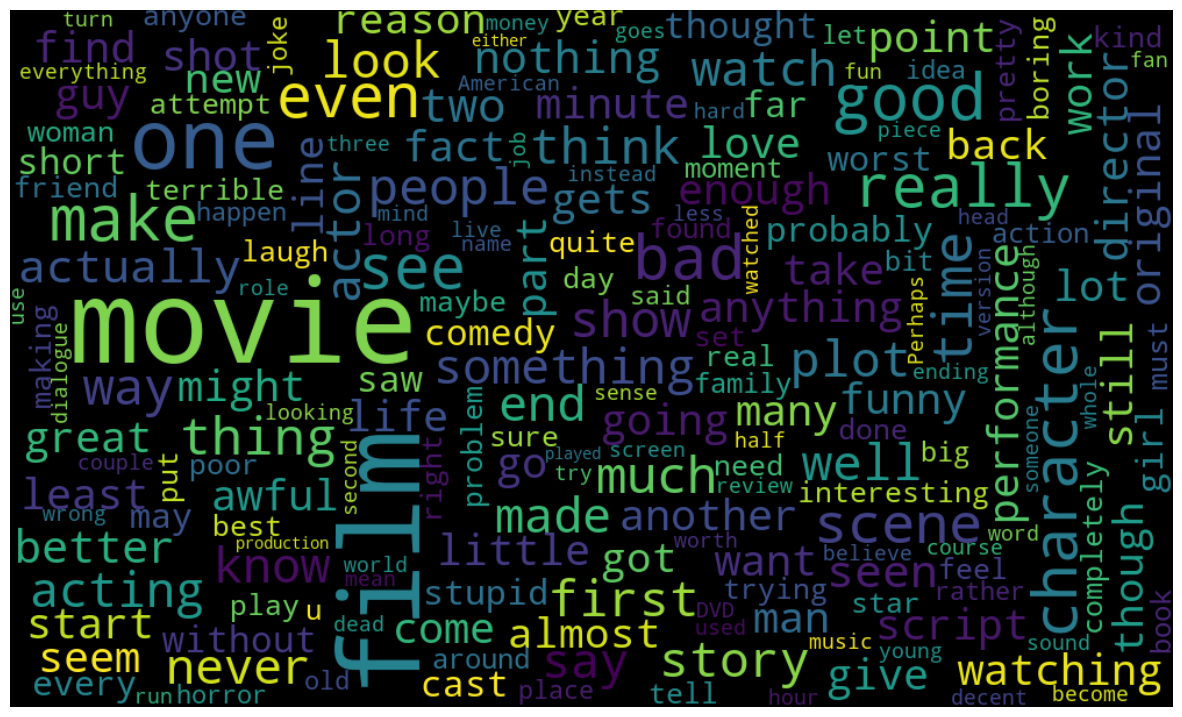

In [8]:
#draw Wordcloud
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

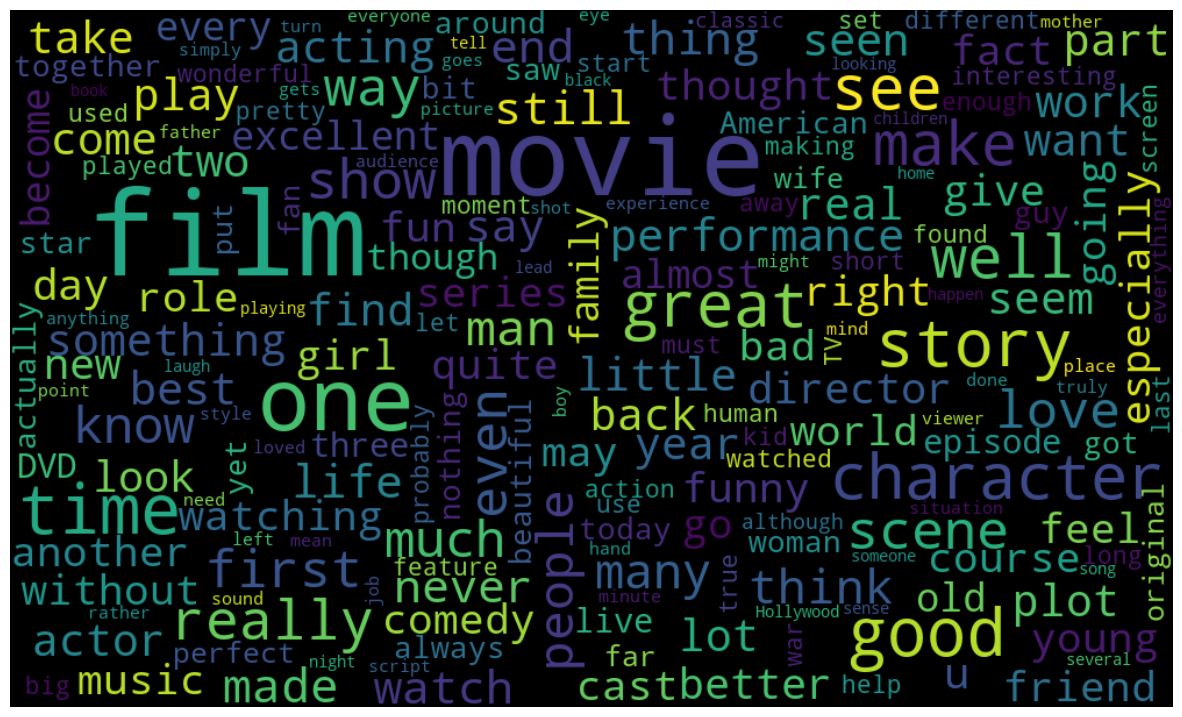

In [9]:
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [11]:
reviews = cv.fit_transform(data['text']).toarray()

In [12]:
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

C:\Users\HP\AppData\Local\Temp\ipykernel_7476\3769914066.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])


In [13]:
data['sentiment'].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [18]:
model.fit(reviews_train,sent_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
predict = model.predict(reviews_test)

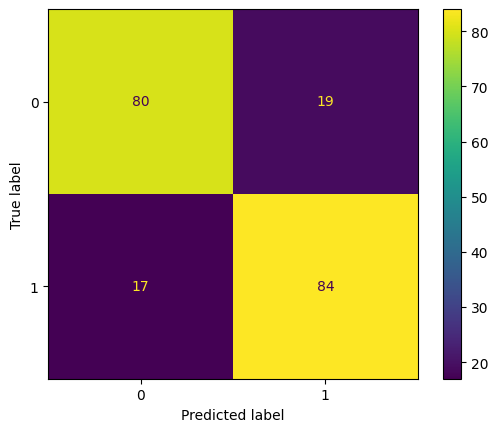

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [21]:
import pickle as pk

In [22]:
pk.dump(model,open('model.pkl','wb'))

In [23]:
pk.dump(cv,open('scaler.pkl','wb'))